# Imports

In [1]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


# Working with a dataset

##Load and explore the dataset

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


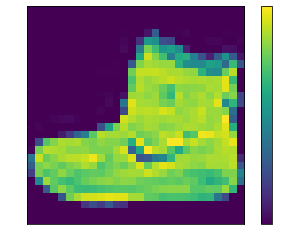

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


## Transform
Convert to grayscale, normalize & standarize

In [0]:
# train_images = (train_images-np.mean(train_images)) / np.std(train_images)
# train_images = tf.squeeze(tf.image.rgb_to_grayscale(train_images / 255.0))

# test_images = (test_images-np.mean(test_images)) / np.std(test_images)
# test_images = tf.squeeze(tf.image.rgb_to_grayscale(test_images / 255.0))

# train_images.shape, test_images.shape
train_images = train_images / 255.0

test_images = test_images / 255.0





Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot
Trouser
T-shirt/top
Shirt
Coat
Dress
Trouser
Coat
Bag
Coat


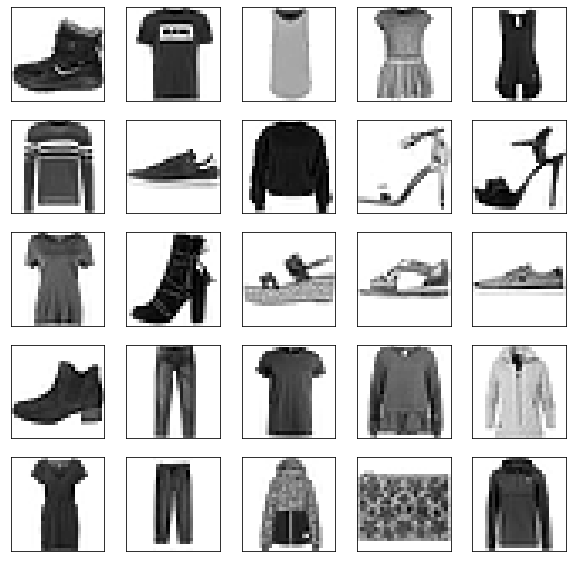

In [10]:
# plt.imshow(train_images[0], cmap=plt.cm.binary)
# plt.title(class_names[train_labels[0][0]])
# plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    print(class_names[train_labels[i]])
plt.show()


## Explore final dataset

# Build the model

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:

#model.summary()

In [13]:
history = model.fit(train_images, 
          train_labels, 
        #  validation_split=0.3,
          epochs=10
          )

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5002 - accuracy: 0.8250
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3744 - accuracy: 0.8643
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3354 - accuracy: 0.8770
Epoch 4/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3140 - accuracy: 0.8855
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2964 - accuracy: 0.8899
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2828 - accuracy: 0.8962
Epoch 7/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2696 - accuracy: 0.8994
Epoch 8/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2572 - accuracy: 0.9048
Epoch 9/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2501 - accuracy: 0.9066
Epoch 10/10
60

# Evaluate

In [0]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# plt.figure(figsize=(10, 10))
# plt.subplot(2, 1, 1)
# plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.setp(plt.legend().get_texts(), color='black')
# plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),0.7])
# plt.title('Training and Validation Accuracy')

# plt.subplot(2, 1, 2)
# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.setp(plt.legend().get_texts(), color='black')
# plt.ylabel('Cross Entropy')
# plt.ylim([0.5,2.0])
# plt.title('Training and Validation Loss')
# plt.xlabel('epoch')
# plt.show()


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 0.34475276967287066
Accuracy: 0.877


# Make predictions

In [0]:
# img_index = np.random.randint(test_images.shape[0])
# img = test_images[img_index]

# predictions = model.predict(tf.expand_dims(img, 0))

# plt.imshow(img, cmap=plt.cm.binary)
# plt.title(class_names[test_labels[img_index][0]])
# plt.show()
# print('\nPredicted class is:', class_names[np.argmax(predictions[0])])


In [16]:
predictions = model.predict(test_images)
predictions[0]


array([1.4224528e-06, 4.0632369e-09, 8.4999225e-09, 6.7760762e-11,
       6.7182744e-09, 7.9817073e-03, 1.6239444e-09, 7.3935119e-03,
       2.4860378e-10, 9.8462337e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


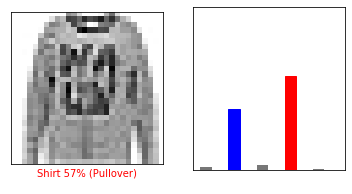

In [20]:
i = 500
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


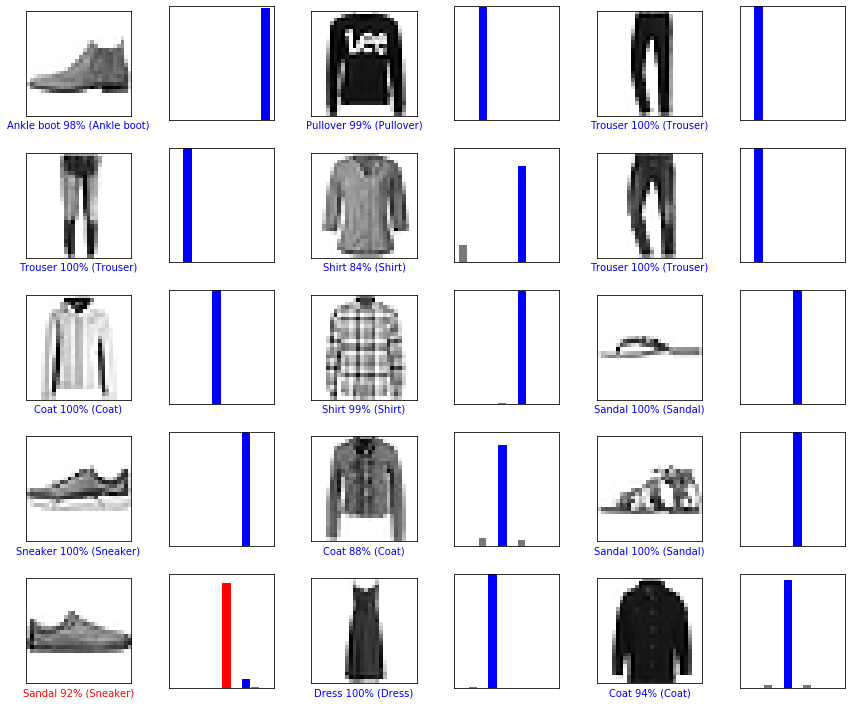

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [0]:
# test_image = tf.keras.utils.get_file('car.jpg','https://www.extremetech.com/wp-content/uploads/2019/05/637873-tesla-model-s-2019-640x360.jpg')
# test_image = Image.open(test_image).resize((32,32)).convert('L')
# test_image = np.array(test_image)/255.0
# predictions = model.predict(tf.expand_dims(test_image, 0))

# plt.imshow(test_image, cmap=plt.cm.binary)
# print('\nPredicted class is:', class_names[np.argmax(predictions[0])])